In [2]:
%reload_ext autoreload
%autoreload 2

from src.iaf.simulation import run_simulation
import numpy as np
from scipy.signal import lfilter
import matplotlib.pyplot as plt

In [5]:
results_high_dp = run_simulation(
    duration=1000,
    basal_depression_ratio=1.1,
    apical_depression_ratio=1.1,
    basal_use_replacement=False,
    apical_use_replacement=False,
    basal_num_synapses=1000,
    apical_num_synapses=1000,
    num_inputs=1000,
    num_signals=1,
    source_strength=1/3,
    gauss_source_width = 1 / 7,
)

100%|██████████| 1000/1000 [01:37<00:00, 10.28it/s]

Simulation completed in 97.24 seconds
Number of spikes: 29549
Average firing rate: 29.55 Hz


In [6]:
results_low_dp = run_simulation(
    duration=1000,
    basal_depression_ratio=1.1,
    apical_depression_ratio=1.05,
    basal_use_replacement=False,
    apical_use_replacement=False,
    basal_num_synapses=1000,
    apical_num_synapses=1000,
    num_inputs=1000,
    num_signals=1,
    source_strength=1/3,
    gauss_source_width = 1 / 7,
)

100%|██████████| 1000/1000 [01:41<00:00,  9.84it/s]

Simulation completed in 101.60 seconds
Number of spikes: 31924
Average firing rate: 31.92 Hz


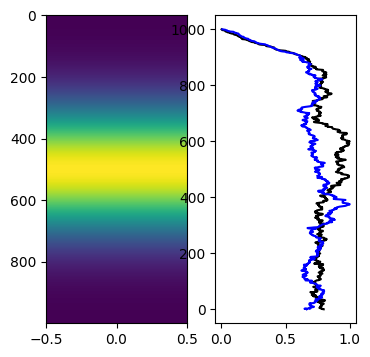

In [7]:
plt.figure(1, figsize=(4, 4))

plt.subplot(1, 2, 1)
plt.imshow(results_low_dp["sim"].source_population.source_loading.T, aspect='auto')

plt.subplot(1, 2, 2)
smooth_factor = round(results_high_dp["sim"].source_population.num_inputs/results_high_dp["sim"].source_population.num_signals/10)
kernel = np.ones(smooth_factor)
saw = lfilter(kernel, 1, results_high_dp["apical_weights"][:, -1])
plt.plot(saw/np.max(saw), range(results_high_dp["sim"].source_population.num_inputs-1, -1, -1), 'k', linewidth=1.5, label="High DP")

smooth_factor = round(results_low_dp["sim"].source_population.num_inputs/results_low_dp["sim"].source_population.num_signals/10)
kernel = np.ones(smooth_factor)
saw = lfilter(kernel, 1, results_low_dp["apical_weights"][:, -1])
plt.plot(saw/np.max(saw), range(results_low_dp["sim"].source_population.num_inputs-1, -1, -1), 'b', linewidth=1.5, label="Low DP")

plt.show()

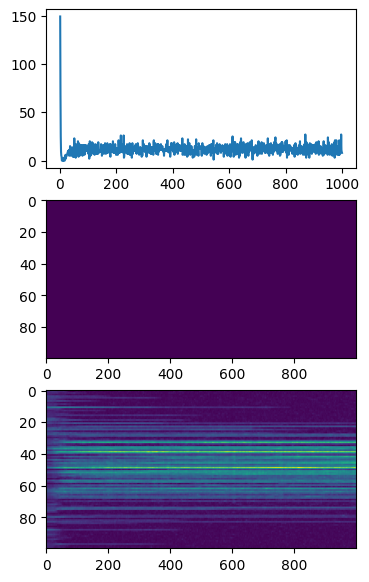

/var/folders/7d/qc682nsj13d_bz11bztzd5hm0000gn/T/ipykernel_17250/2606275003.py:31: RuntimeWarning: invalid value encountered in divide
  plt.plot(sbw/np.max(sbw), range(results["sim"].source_population.num_inputs-1, -1, -1), 'k', linewidth=1.5)


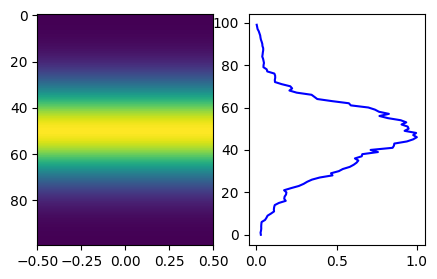

In [8]:
# Create spike train and PSTH
results = results_high_dp

NT = int(np.round(results["sim"].duration / results["sim"].dt))
dt = results["sim"].dt
spikes = np.zeros(NT)
spikes[results["spike_times"]] = 1
psth_window = 1  # in seconds
dpsth = round(psth_window/dt)
psth = np.sum(spikes.reshape(-1, dpsth), axis=1)/psth_window
tvec = np.arange(NT) * dt + dt

# Create plots
plt.figure(1, figsize=(4, 7))
plt.subplot(3, 1, 1)
plt.plot(range(1, len(psth) + 1), psth)
plt.subplot(3, 1, 2)
plt.imshow(results["basal_weights"], aspect='auto')
plt.subplot(3, 1, 3)
plt.imshow(results["apical_weights"], aspect='auto')
plt.show()

plt.figure(2, figsize=(5, 3))
plt.subplot(1, 2, 1)
plt.imshow(results["sim"].source_population.source_loading.T, aspect='auto')
plt.subplot(1, 2, 2)
smooth_factor = round(results["sim"].source_population.num_inputs/results["sim"].source_population.num_signals/10)
kernel = np.ones(smooth_factor)
sbw = lfilter(kernel, 1, results["basal_weights"][:, -1])
saw = lfilter(kernel, 1, results["apical_weights"][:, -1])
plt.plot(sbw/np.max(sbw), range(results["sim"].source_population.num_inputs-1, -1, -1), 'k', linewidth=1.5)
plt.plot(saw/np.max(saw), range(results["sim"].source_population.num_inputs-1, -1, -1), 'b', linewidth=1.5)
plt.show()

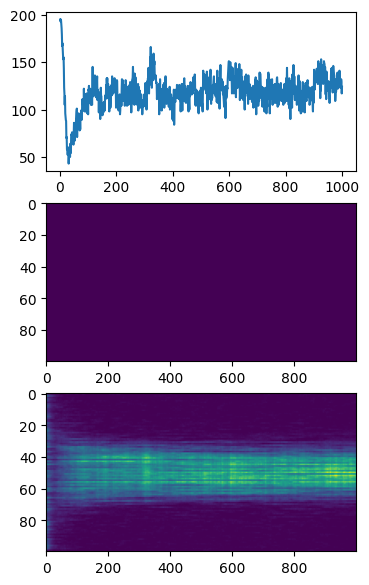

/var/folders/7d/qc682nsj13d_bz11bztzd5hm0000gn/T/ipykernel_17250/2108866355.py:31: RuntimeWarning: invalid value encountered in divide
  plt.plot(sbw/np.max(sbw), range(results["sim"].source_population.num_inputs-1, -1, -1), 'k', linewidth=1.5)


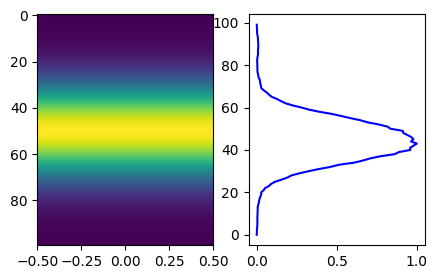

In [9]:
# Create spike train and PSTH
results = results_low_dp

NT = int(np.round(results["sim"].duration / results["sim"].dt))
dt = results["sim"].dt
spikes = np.zeros(NT)
spikes[results["spike_times"]] = 1
psth_window = 1  # in seconds
dpsth = round(psth_window/dt)
psth = np.sum(spikes.reshape(-1, dpsth), axis=1)/psth_window
tvec = np.arange(NT) * dt + dt

# Create plots
plt.figure(1, figsize=(4, 7))
plt.subplot(3, 1, 1)
plt.plot(range(1, len(psth) + 1), psth)
plt.subplot(3, 1, 2)
plt.imshow(results["basal_weights"], aspect='auto')
plt.subplot(3, 1, 3)
plt.imshow(results["apical_weights"], aspect='auto')
plt.show()

plt.figure(2, figsize=(5, 3))
plt.subplot(1, 2, 1)
plt.imshow(results["sim"].source_population.source_loading.T, aspect='auto')
plt.subplot(1, 2, 2)
smooth_factor = round(results["sim"].source_population.num_inputs/results["sim"].source_population.num_signals/10)
kernel = np.ones(smooth_factor)
sbw = lfilter(kernel, 1, results["basal_weights"][:, -1])
saw = lfilter(kernel, 1, results["apical_weights"][:, -1])
plt.plot(sbw/np.max(sbw), range(results["sim"].source_population.num_inputs-1, -1, -1), 'k', linewidth=1.5)
plt.plot(saw/np.max(saw), range(results["sim"].source_population.num_inputs-1, -1, -1), 'b', linewidth=1.5)
plt.show()